In [5]:
'''
Author: Mikhail Milchenko, mmilchenko@wustl.edu
Copyright (c) 2021, Computational Imaging Lab, Washington University School of Medicine

Redistribution and use in source and binary forms, for any purpose, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
'''
import argparse, numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [26]:
def expand_3d_contour(contours,dist,imwid, imht):
    '''
    The coordinates are assumed to be in mm.
    Expand by the given distance a 3D object represented by
    a list of closed 2D contours.        
    contours is a list of lists of array-like 3d points:
    dim1 <-- x , dim2 <-- y, dim3 <-- z (constant), dim4 <-- point index.
    
    All pts in each 2D contour are assumed to have the same z value.
    
    Output: a list of new 2D contours (lists of 3D numpy arrays)
    '''
    c,c_out=contours,[]
    imdepth=len(c)
    
    for z in range (imdepth):    
        c0=np.array(c[z])
        if z>0:
            c_1=np.array(c[z-1])
            d_1=np.argmin(cdist(c0,c_1),1)
        else: 
            d_1=None

        if z<imdepth-1:
            c1=np.array(c[z+1])
            d1=np.argmin(cdist(c0,c1),1)
        else: 
            d1=None

        co=[]
        l=len(c0)
        z0=c0[0][2]

        for ind in range(len(c0)):
            pt_1,pt0,pt1=c0[ ind-1 ],c0[ind],c0[ (ind+1) % l ]
            vl,vr=pt_1-pt0, pt1-pt0
            normals=[]
            if d_1 is not None:
                vd=c_1[d_1[ind]]-pt0
                nl,nr=np.cross(vd,vl),np.cross(vr,vd)
                normals.append(nl/np.linalg.norm(nl))
                normals.append(nr/np.linalg.norm(nr))
            if d1 is not None:
                vu=c1[d1[ind]]-pt0
                nl,nr=np.cross(vl,vu),np.cross(vu,vr)
                normals.append(nl/np.linalg.norm(nl))
                normals.append(nr/np.linalg.norm(nr))

            normal=np.array(normals).sum(0)
            normal/=np.linalg.norm(normal)
            pt_new=pt0+normal*dist
            pt_new[2]=z0 #project to the plane of the old contour
            co.append(pt_new)

        c_out.append(co)        
        
    return c_out    

def show_contour(c):
    x=[ pt[0] for pt in c ]
    y=[ pt[1] for pt in c ]
    print(x)
    print(y)
    plt.plot(x,y)
        

In [27]:
c=[]

c.append([[2,2,1],[4,2,1],[2,4,1]])
c.append([[2,2,2],[2,4,2],[4,4,2],[4,2,2]])
c.append([[2.1,1.8,3],[2.3,3.8,3],[4.1,3.8,3],[3.5,2.1,3],[3,2,3]])
dist=1.0
imwid,imht=10,10
print ("Input list of contours")
c


Input list of contours


[[[2, 2, 1], [4, 2, 1], [2, 4, 1]],
 [[2, 2, 2], [2, 4, 2], [4, 4, 2], [4, 2, 2]],
 [[2.1, 1.8, 3], [2.3, 3.8, 3], [4.1, 3.8, 3], [3.5, 2.1, 3], [3, 2, 3]]]

In [28]:
c_out=expand_3d_contour(c,dist,imwid, imht)
print("List of output contours")
c_out


List of output contours


[[array([2.70710678, 2.70710678, 1.        ]),
  array([3.07612047, 2.38268343, 1.        ]),
  array([2.38268343, 3.07612047, 1.        ])],
 [array([1.29074538, 1.29588481, 2.        ]),
  array([1.30735009, 4.70070008, 2.        ]),
  array([4.77333539, 4.55345527, 2.        ]),
  array([4.67537929, 1.28875239, 2.        ])],
 [array([1.43019531, 1.06185537, 3.        ]),
  array([1.67549074, 4.50833222, 3.        ]),
  array([4.9186797 , 4.37331323, 3.        ]),
  array([4.0903614 , 1.38115605, 3.        ]),
  array([3.20224588, 1.04177601, 3.        ])]]

In [25]:
p0=np.array([2,2,2])
p_1=np.array([4,2,2])
p1=np.array([2,4,2])
pl=np.array([2.1,1.8,3])

v1=p1-p0; v2=p_1-p0; vl=pl-p0;

n1=np.cross(v1,vl);
n2=np.cross(vl,v2);

print(n1)
print(n2)
n=n1+n2; print(p0+n/np.linalg.norm(n))

[ 2.   0.  -0.2]
[-0.   2.   0.4]
[2.70534562 2.70534562 2.07053456]


[2.1, 2.3, 4.1, 3.5, 3]
[1.8, 3.8, 3.8, 2.1, 2]


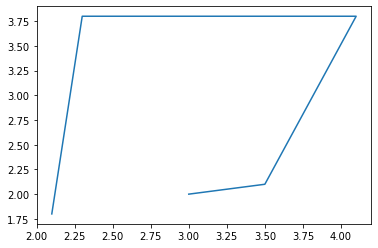

In [34]:
show_contour(c[2])

[1.4301953060285078, 1.6754907366001706, 4.918679697317544, 4.090361403189799, 3.2022458793184203]
[1.0618553676245404, 4.508332218011347, 4.373313232341448, 1.3811560473304585, 1.0417760133468594]


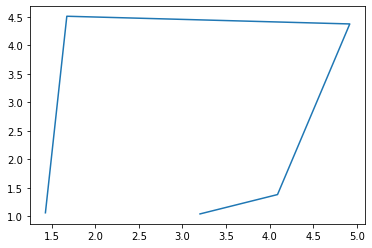

In [33]:
show_contour(c_out[2])

[1.2942182514061875, 2.7026327754829396, 4.790007486446618, 3.316848970284341]
[2.700667485989632, 4.710798965022269, 3.434612964168522, 1.2805679113518122]


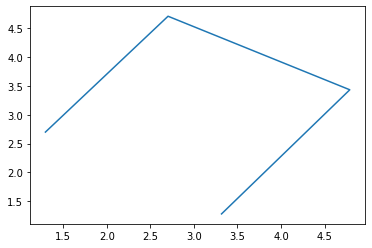

In [17]:
show_contour(c_out[1])

In [20]:
cdist(c[1],c[2])

array([[1.02469508, 2.0808652 , 2.94108823, 1.80554701, 1.41421356],
       [2.41867732, 1.06301458, 2.33452351, 2.61916017, 2.44948974],
       [3.07408523, 1.98242276, 1.02469508, 2.20454077, 2.44948974],
       [2.15638587, 2.67020598, 2.06155281, 1.12249722, 1.41421356]])